In [ ]:
# ===========================
# Preprocessing Notebook
# ===========================

# Step 0: Imports
import pandas as pd
import re
from datasets import load_dataset

# Step 1: Load the dataset
# Adjust path if needed
dataset = load_dataset("GM07/medhal")



/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00011.parquet:   0%|          | 0.00/252M [00:00<?, ?B/s]

data/train-00001-of-00011.parquet:   0%|          | 0.00/250M [00:00<?, ?B/s]

data/train-00002-of-00011.parquet:   0%|          | 0.00/250M [00:00<?, ?B/s]

data/train-00003-of-00011.parquet:   0%|          | 0.00/251M [00:00<?, ?B/s]

data/train-00004-of-00011.parquet:   0%|          | 0.00/250M [00:00<?, ?B/s]

data/train-00005-of-00011.parquet:   0%|          | 0.00/250M [00:00<?, ?B/s]

data/train-00006-of-00011.parquet:   0%|          | 0.00/252M [00:00<?, ?B/s]

data/train-00007-of-00011.parquet:   0%|          | 0.00/253M [00:00<?, ?B/s]

data/train-00008-of-00011.parquet:   0%|          | 0.00/251M [00:00<?, ?B/s]

data/train-00009-of-00011.parquet:   0%|          | 0.00/248M [00:00<?, ?B/s]

data/train-00010-of-00011.parquet:   0%|          | 0.00/253M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/819608 [00:00<?, ? examples/s]

In [ ]:
# ============================
# 0. IMPORTS
# ============================
import pandas as pd
import json
import re
from datasets import load_dataset

from google.colab import drive
drive.mount('/content/drive')


# ============================
# 1. SETTINGS
# ============================
JSONL_PATH = "/content/drive/MyDrive/Colab Notebooks/medhal_preprocessed.jsonl"
CSV_PATH = "/content/drive/MyDrive/Colab Notebooks/medhal_preprocessed.csv"

CHUNK_SIZE = 100000
NUM_CHUNKS = 10  # stop after 10 chunks (1M rows max)

print("Saving JSONL to:", JSONL_PATH)

# ============================
# 2. CLEAN TEXT
# ============================
def clean(text):
    if text is None:
        return ""
    text = str(text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

# ============================
# 3. LOAD STREAMING DATA
# ============================
dataset_stream = load_dataset(
    "GM07/medhal",
    split="train",
    streaming=True
)

# ============================
# 4. PROCESS AND SAVE TO JSONL
# ============================
count = 0
chunk_id = 1

with open(JSONL_PATH, "w", encoding="utf-8") as f:

    for row in dataset_stream:

        # Stop after NUM_CHUNKS
        if chunk_id > NUM_CHUNKS:
            break

        statement = clean(row.get("statement", ""))
        context = clean(row.get("context", ""))
        explanation = clean(row.get("explanation", ""))

        full_text = " ".join([statement, context, explanation]).strip()

        out = {
            "id": row.get("id", ""),
            "inner_id": row.get("inner_id", ""),
            "full_text": full_text,
            "label": int(row.get("label", 0)),
            "synthetic": bool(row.get("synthetic", False))
        }

        f.write(json.dumps(out, ensure_ascii=False) + "\n")

        count += 1

        if count % CHUNK_SIZE == 0:
            print(f"Saved chunk {chunk_id} ({count} rows)")
            chunk_id += 1

print("\nJSONL SAVED:", JSONL_PATH)

# ============================
# 5. CONVERT JSONL → CLEAN CSV
# ============================
print("Converting JSONL → CSV...")

df_iter = pd.read_json(JSONL_PATH, lines=True, chunksize=CHUNK_SIZE)

first = True
for chunk in df_iter:
    chunk.to_csv(
        CSV_PATH,
        mode="w" if first else "a",
        index=False
    )
    first = False

print("\n=== DONE! CLEANED CSV SAVED ===")
print("CSV Path:", CSV_PATH)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Saving JSONL to: /content/drive/MyDrive/Colab Notebooks/medhal_preprocessed.jsonl
Saved chunk 1 (100000 rows)
Saved chunk 2 (200000 rows)
Saved chunk 3 (300000 rows)
Saved chunk 4 (400000 rows)
Saved chunk 5 (500000 rows)
Saved chunk 6 (600000 rows)
Saved chunk 7 (700000 rows)
Saved chunk 8 (800000 rows)

JSONL SAVED: /content/drive/MyDrive/Colab Notebooks/medhal_preprocessed.jsonl
Converting JSONL → CSV...

=== DONE! CLEANED CSV SAVED ===
CSV Path: /content/drive/MyDrive/Colab Notebooks/medhal_preprocessed.csv


In [ ]:
import pandas as pd

CSV_PATH = "/content/drive/MyDrive/Colab Notebooks/medhal_preprocessed.csv"
df = pd.read_csv(CSV_PATH, nrows=5)  # just read first 5 rows to see structure

print("Columns:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())
print("\nShape:", df.shape)


Columns: ['id', 'inner_id', 'full_text', 'label', 'synthetic']

Data types:
 id           object
inner_id     object
full_text    object
label         int64
synthetic      bool
dtype: object

First 5 rows:
                                      id                              inner_id  \
0  1dc2b3d7-d75d-47f7-a426-fd8c128ba377  550a295c-2a2b-4be8-ab87-e036f70a2c15   
1  c67d13e6-0c4b-4699-a32b-f76ae8324387  e9cb6fe0-604a-42a2-b107-7c97d987629b   
2  19574e41-ac83-4b58-85c2-8773a6213b2f                                 14253   
3  70a3c380-e947-4b63-a0f5-89efc708fbd2                                107301   
4  47078df2-3cda-4a3b-bc47-9c387755da5d                                 62178   

                                           full_text  label  synthetic  
0  The tympanic membrane is part of the ear that ...      1      False  
1  The 3rd heart sound is due to the closure of t...      0      False  
2  moreover, these deficiencies are likely to be ...      1      False  
3  The patient

========= DONE PROCESSING =========

df.shape = (819616, 5)

df.columns =
['id', 'inner_id', 'full_text', 'label', 'synthetic']

df.head() =
                                     id                              inner_id  \
0  1dc2b3d7-d75d-47f7-a426-fd8c128ba377  550a295c-2a2b-4be8-ab87-e036f70a2c15   
1  c67d13e6-0c4b-4699-a32b-f76ae8324387  e9cb6fe0-604a-42a2-b107-7c97d987629b   
2  19574e41-ac83-4b58-85c2-8773a6213b2f                                 14253   
3  70a3c380-e947-4b63-a0f5-89efc708fbd2                                107301   
4  47078df2-3cda-4a3b-bc47-9c387755da5d                                 62178   

                                           full_text  label  synthetic  
0  The tympanic membrane is part of the ear that ...      1      False  
1  The 3rd heart sound is due to the closure of t...      0      False  
2  moreover, these deficiencies are likely to be ...      1      False  
3  The patient undergoes a Fluorodeoxyglucose pos...      0       True  
4  The 

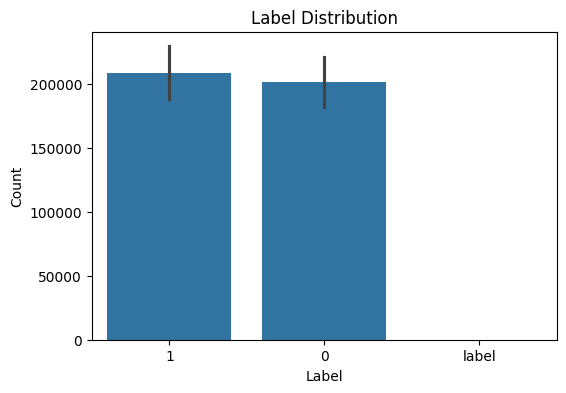

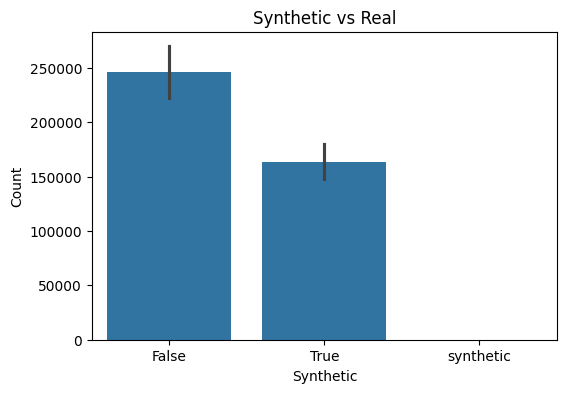

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

CSV_PATH = "/content/drive/MyDrive/Colab Notebooks/medhal_preprocessed.csv"
CHUNK_SIZE = 50000

# ============================
# ACCUMULATORS
# ============================
total_rows = 0
column_names = None
head_rows = None

missing_counts = Counter()
label_counts = Counter()
synthetic_counts = Counter()

# ============================
# PROCESS CHUNKS
# ============================
for chunk_id, chunk in enumerate(pd.read_csv(CSV_PATH, chunksize=CHUNK_SIZE)):

    if chunk_id == 0:
        # Save columns
        column_names = list(chunk.columns)

        # Save head (first 5 rows)
        head_rows = chunk.head()

    # Count rows
    rows = len(chunk)
    total_rows += rows

    # Missing values
    missing_counts.update(chunk.isnull().sum().to_dict())

    # Value counts
    label_counts.update(chunk["label"].value_counts().to_dict())
    synthetic_counts.update(chunk["synthetic"].value_counts().to_dict())

print("========= DONE PROCESSING =========\n")

# ============================
# 1. EQUIVALENT OF df.shape
# ============================
print("df.shape =", (total_rows, len(column_names)))

# ============================
# 2. df.columns
# ============================
print("\ndf.columns =")
print(column_names)

# ============================
# 3. df.head()
# ============================
print("\ndf.head() =")
print(head_rows)

# ============================
# 4. df.info() (manual)
# ============================
print("\n========= df.info() =========")

print(f"<class 'pandas.core.frame.DataFrame'>")
print("RangeIndex: {} entries".format(total_rows))

print("Columns:")
for col in column_names:
    dtype = head_rows[col].dtype  # approximate dtype
    print(f"  {col}: {dtype}")

# ============================
# 5. Missing values
# ============================
print("\n========= Missing Values =========")
for col, val in missing_counts.items():
    print(f"{col}: {val}")

# ============================
# 6. Label counts
# ============================
print("\n========= Label Value Counts =========")
print(label_counts)

# ============================
# 7. Synthetic counts
# ============================
print("\n========= Synthetic Value Counts =========")
print(synthetic_counts)

# ============================
# 8. PLOTS (safe, using final counts)
# ============================
plt.figure(figsize=(6,4))
sns.barplot(x=list(label_counts.keys()), y=list(label_counts.values()))
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x=list(synthetic_counts.keys()), y=list(synthetic_counts.values()))
plt.title("Synthetic vs Real")
plt.xlabel("Synthetic")
plt.ylabel("Count")
plt.show()
